In [1]:
%reset-f
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import numpy as np

import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

from res_ind_lib import *

import os, time


In [3]:
import pandas as pd

plt.rcParams["savefig.dpi"]=80
plt.rcParams["savefig.directory"]="img/"
plt.rcParams["legend.fancybox"]=True

os.makedirs("img",exist_ok=True)

font = {'family' : 'serif',
    'weight' : 'normal',
    'size'   : 15}

plt.rc('font', **font)

# data, options, functions

In [4]:
df=pd.read_csv("results/df.csv").dropna()

names = df.country
tool_tips=df.dropna().country.tolist()




In [5]:
debug=False

#marker size
mks=75

def annotated_plot(x_,y_,**kwargs):
    xlabel_=kwargs.get("xlabel",None)
    ylabel_=kwargs.get("ylabel",None)
    logical=kwargs.get("logical",None)
    saveto=kwargs.get("saveto",None)
    names_ = kwargs.get("names",None)
    tool_tips = kwargs.get("tool_tips",None)
    color_=kwargs.get("color","blue")
    
    enforce_zerobound =  kwargs.get("enforce_zerobound",True)
    
    same_fig=kwargs.get("same_fig",False)
    
    if not same_fig:
        fig_ = plt.figure(figsize=(9,7))
           
    sc=plt.scatter(x_,y_,color=color_,s=mks,alpha=.5,clip_on=False)
    if (logical is not None) & (~debug):
        for label, x, y in zip(names_[logical], x_[logical], y_[logical]):
            plt.annotate(
                label, 
                xy = (x, y), xytext = (10, 0),
                textcoords = 'offset points', ha = 'left', va = 'center',fontsize=13
                #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
            )
            
    if ylabel_ is not None:
        plt.ylabel(ylabel_)
    if xlabel_ is not None:
        plt.xlabel(xlabel_)        
    
    if enforce_zerobound:
        plt.xlim(xmin=0);plt.ylim(ymin=0)
    
    if saveto is not None:
        plt.savefig("img/"+saveto)
    
    if debug:
        for label, x, y in zip(names, x_, y_):
            plt.annotate(
                label, 
                xy = (x, y), xytext = (2, 0),
                textcoords = 'offset points', ha = 'left', va = 'center',fontsize=8
                #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
            )
    

# Plots

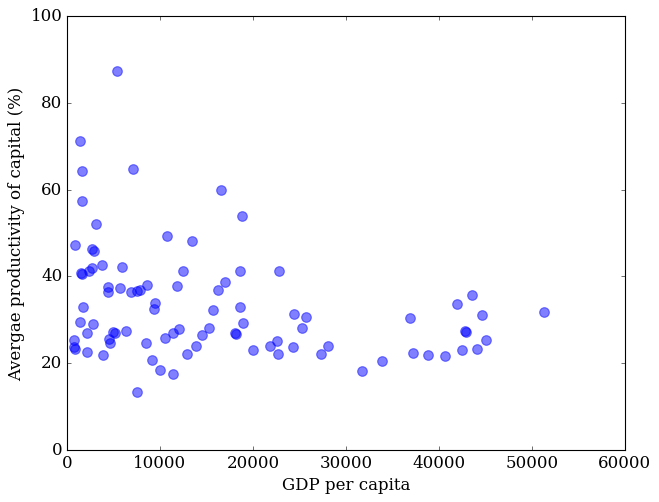

In [6]:
annotated_plot(df.gdp_pc_pp,100*df.avg_prod_k,color="blue")
plt.xlabel("GDP per capita")
plt.ylabel("Avergae productivity of capital (%)")
plt.xlim(xmin=0)

plt.savefig("img/mu_vs_gdp.png",bbox_inches="tight")



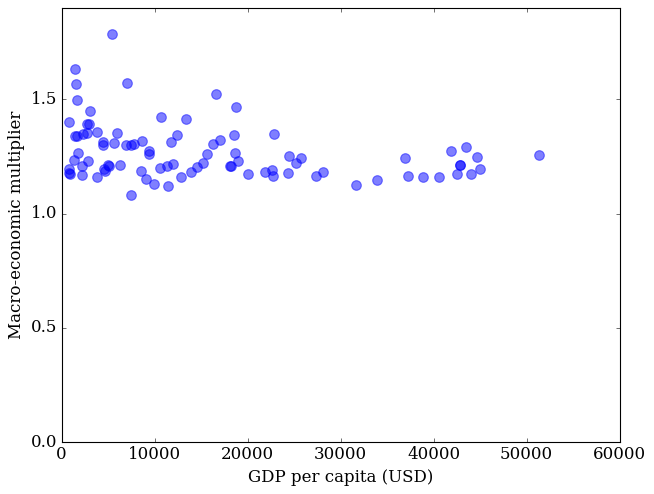

In [7]:
df_=df[["gdp_pc_pp","macro_multiplier","country"]].dropna()

annotated_plot(df_["gdp_pc_pp"],df_["macro_multiplier"],tool_tips=tool_tips);
plt.xlim(xmin=0)
plt.ylabel("Macro-economic multiplier")
plt.xlabel("GDP per capita (USD)");
labels = df_["country"].tolist()


plt.savefig("img/macro_multiplier.png",bbox_inches="tight")


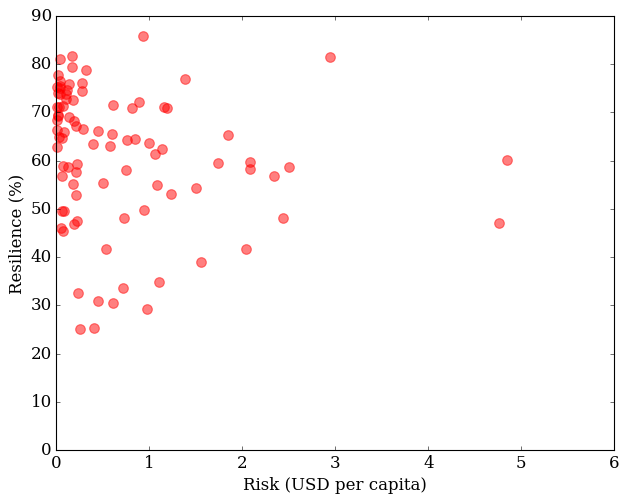

In [8]:
annotated_plot(100*df.risk,100*df.resilience,color="red")
plt.ylabel("Resilience (%)")
plt.xlabel("Risk (USD per capita)")
plt.xlim(xmin=0)

plt.savefig("img/risk_vs_resi.png",bbox_inches="tight")


In [9]:
df[["risk","resilience"]].corr()

,risk,resilience
risk,1.00000,-0.17561
resilience,-0.17561,1.00000


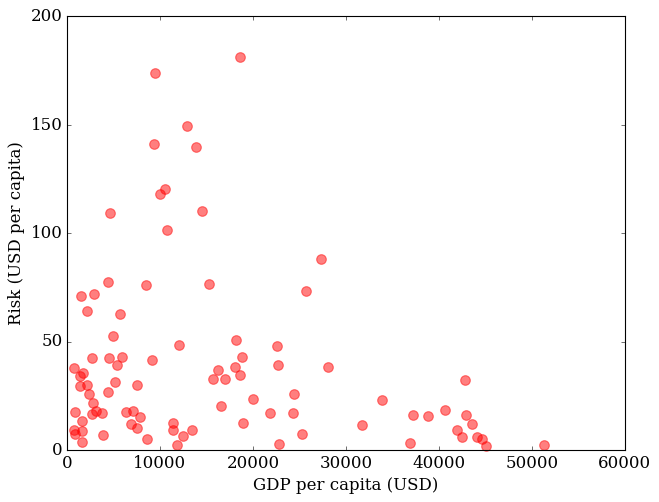

In [10]:
annotated_plot(df["gdp_pc_pp"],df["equivalent_cost"],color="red")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Risk (USD per capita)")
plt.xlim(xmin=0)

plt.savefig("img/risk_level_vs_gdp.png",bbox_inches="tight")

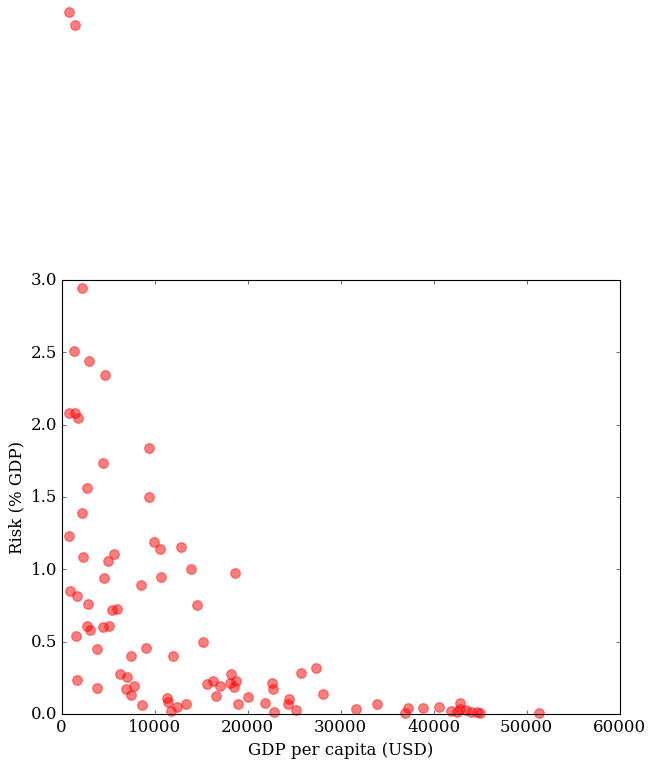

In [11]:
annotated_plot(df["gdp_pc_pp"],100*df["risk"],color="red")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Risk (% GDP)")

plt.xlim(xmin=0)

plt.savefig("img/risk_vs_gdp.png",bbox_inches="tight")

plt.ylim(ymax=3)

plt.savefig("img/risk_vs_gdp_trunc.png",bbox_inches="tight")

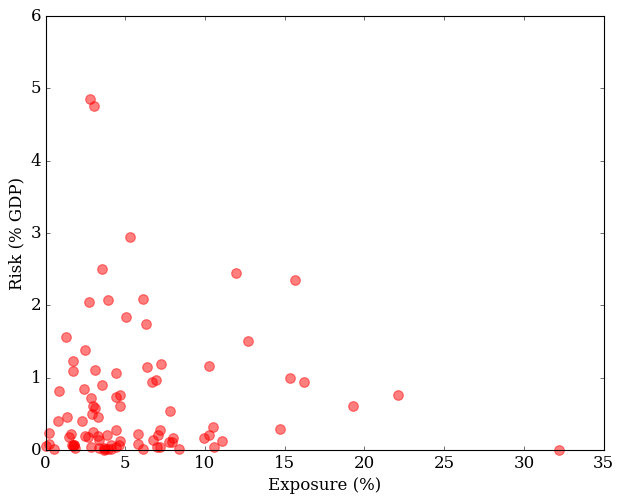

In [12]:
annotated_plot(df["far"]*100,100*df["risk"],color="red")
plt.xlabel("Exposure (%)")
plt.ylabel("Risk (% GDP)")
plt.xlim(xmin=0)

plt.savefig("img/risk_depends_exposure.png",bbox_inches="tight")

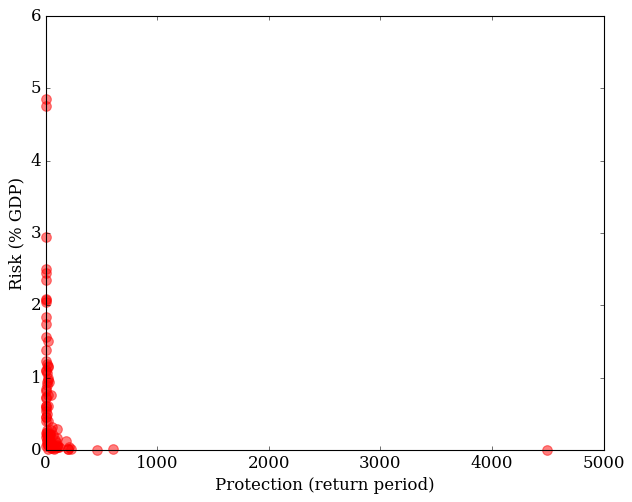

In [13]:
annotated_plot(df["protection"],100*df["risk"],color="red")
plt.xlabel("Protection (return period)")
plt.ylabel("Risk (% GDP)")
plt.xlim(xmin=0)

plt.savefig("img/risk_depends_protection.png",bbox_inches="tight")

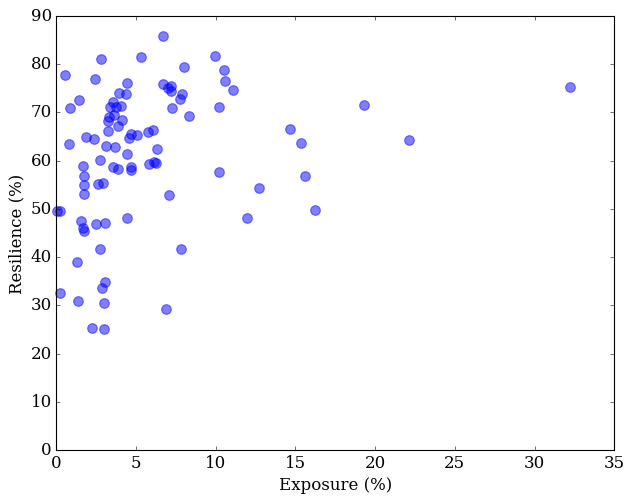

In [14]:
annotated_plot(df["far"]*100,100*df["resilience"])
plt.xlabel("Exposure (%)")
plt.ylabel("Resilience (%)")
plt.xlim(xmin=0)

plt.savefig("img/resilient_vs_expo.png",bbox_inches="tight")

## eta impact

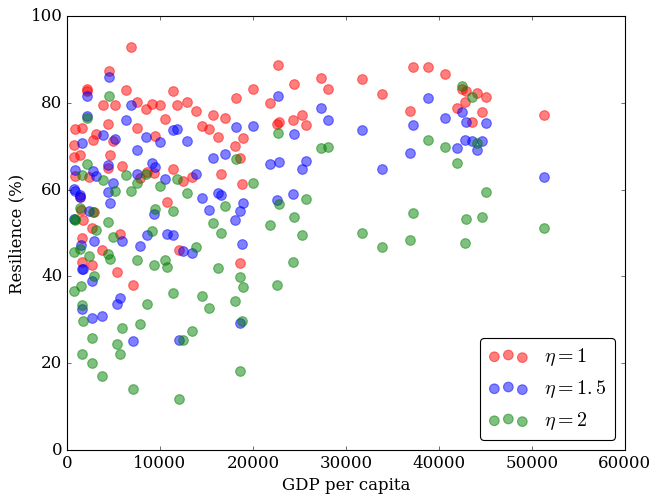

In [15]:
if not False:
    df_s=df.append(pd.read_csv("results/df_sensit_results.csv"))
    countries1   = ["eta=1" in c for c in df_s.country]
    countries15 = ["$" not in c for c in df_s.country]
    countries2   = ["eta=2" in c for c in df_s.country]
    #annotated_plot(df_s.ix[countries15,"gdp_pc_pp"],df_s.ix[countries15,"resilience"]*100,color="blue")
    annotated_plot(df_s.ix[countries1,"gdp_pc_pp"],df_s.ix[countries1,"resilience"]*100,color="red")
    annotated_plot(df_s.ix[countries15,"gdp_pc_pp"],df_s.ix[countries15,"resilience"]*100,color="blue",same_fig=True)
    annotated_plot(df_s.ix[countries2,"gdp_pc_pp"],df_s.ix[countries2,"resilience"]*100,color="green",same_fig=True)
    plt.xlabel("GDP per capita")
    plt.ylabel("Resilience (%)")
    plt.xlim(xmin=0)

    plt.legend(["$\eta=1$","$\eta=1.5$","$\eta=2$"],loc="lower right")
    # This should be called after all axes have been added
    #plt.tight_layout()
    plt.savefig("img/resilience_eta.png",bbox_inches="tight")

3.64319789621
5.50964339055
2.21762840363


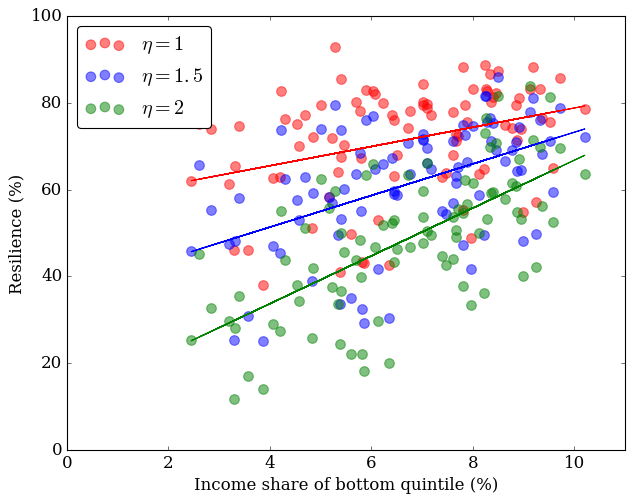

In [16]:
if not False:
    annotated_plot(df_s.ix[countries1,"share1"]*100,df_s.ix[countries1,"resilience"]*100,color="red")
    annotated_plot(df_s.ix[countries15,"share1"]*100,df_s.ix[countries15,"resilience"]*100,color="blue",same_fig=True)
    annotated_plot(df_s.ix[countries2,"share1"]*100,df_s.ix[countries2,"resilience"]*100,color="green",same_fig=True)
    plt.xlabel("Income share of bottom quintile (%)")
    plt.ylabel("Resilience (%)")
    plt.xlim(xmin=0)

    plt.legend(["$\eta=1$","$\eta=1.5$","$\eta=2$"],loc="upper left")

    result = sm.ols(formula="resilience ~ share1", data=df_s.ix[countries15]).fit()
    exp15=result.params.Intercept+result.params.share1*df_s.ix[countries15,"share1"]
    plt.plot(df_s.ix[countries15,"share1"]*100,exp15*100)
    print(result.params.share1)


    result = sm.ols(formula="resilience ~ share1", data=df_s.ix[countries2]).fit()
    exp2=result.params.Intercept+result.params.share1*df_s.ix[countries2,"share1"]
    plt.plot(df_s.ix[countries2,"share1"]*100,exp2*100)
    print(result.params.share1)

    result = sm.ols(formula="resilience ~ share1", data=df_s.ix[countries1]).fit()
    exp1=result.params.Intercept+result.params.share1*df_s.ix[countries1,"share1"]
    plt.plot(df_s.ix[countries1,"share1"]*100,exp1*100)
    print(result.params.share1)


    plt.savefig("img/resilience_eta_share1.png",bbox_inches="tight")

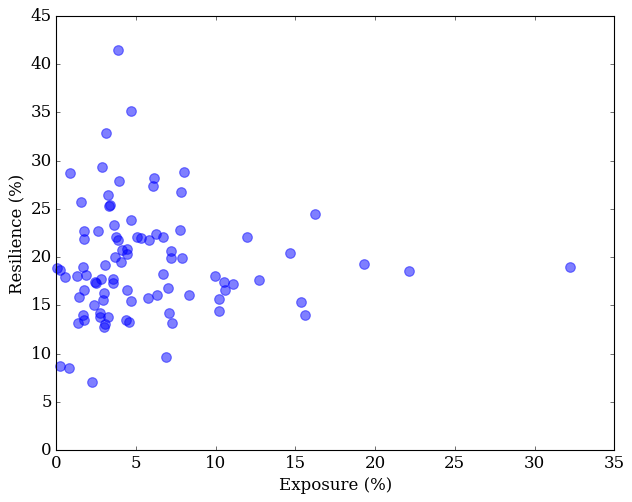

In [17]:
annotated_plot(df["far"]*100,100*df["resilience"]*df.avg_prod_k)
plt.xlabel("Exposure (%)")
plt.ylabel("Resilience (%)")
plt.xlim(xmin=0)

plt.savefig("img/resilient_vs_expo__.png",bbox_inches="tight")

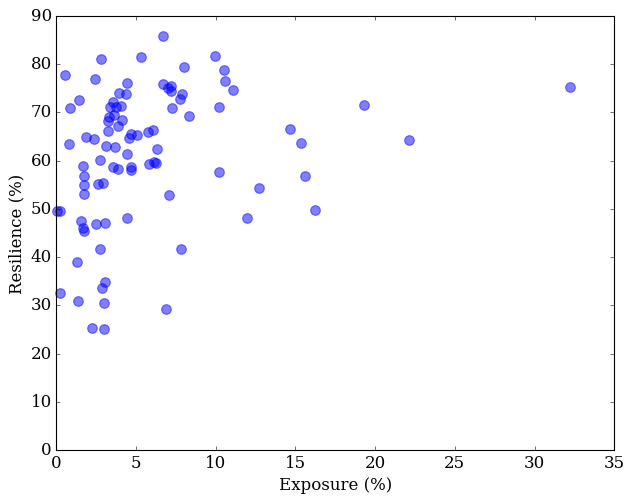

In [18]:
annotated_plot(df["far"]*100,100*df["resilience"])
plt.xlabel("Exposure (%)")
plt.ylabel("Resilience (%)")
plt.xlim(xmin=0)

plt.savefig("img/resilient_vs_expo.png",bbox_inches="tight")

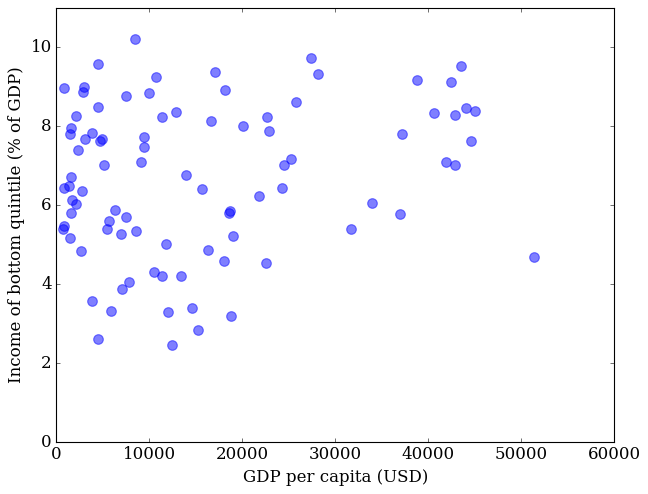

In [19]:
annotated_plot(df["gdp_pc_pp"],100*df["share1"],ylabel = "Income of bottom quintile (% of GDP)",xlabel = "GDP per capita (USD)");
plt.xlim(xmin=0)

plt.savefig("img/income_bottom_quintile.png",bbox_inches="tight")

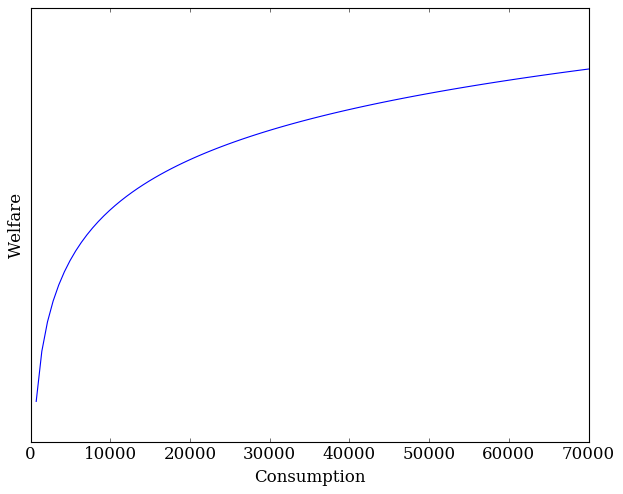

In [20]:
x=np.linspace(0,70000,100);
plt.figure(figsize=(9,7))

plt.plot(x,np.log(x))
plt.ylabel("Welfare")
plt.xlabel("Consumption");
plt.yticks([])
plt.xlim(xmin=0)

plt.savefig("img/welfare_function",bbox_inches="tight")

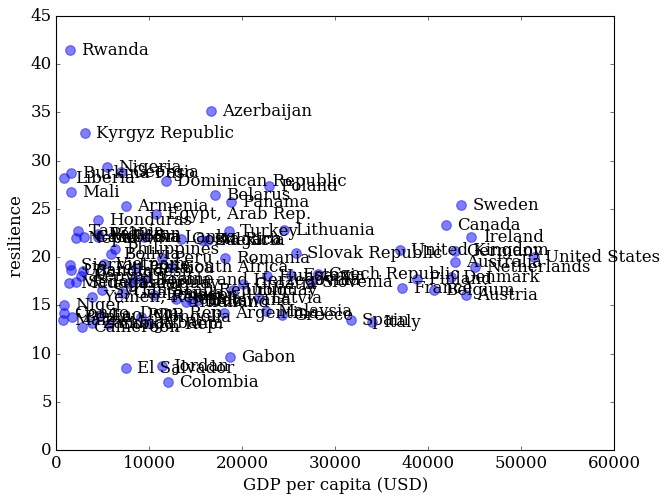

In [21]:
# resilience times mu

y=100*df.resilience*df.avg_prod_k
x=df["gdp_pc_pp"]
annotated_plot(x,y,xlabel = "GDP per capita (USD)",ylabel = "resilience ");



logical =  y>.2

for label, x_, y_ in zip(df.country[logical], x[logical],y[logical]):
    plt.annotate(
        label, 
        xy = (x_, y_), xytext = (10, 0),
        textcoords = 'offset points', ha = 'left', va = 'center',
        #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
)




plt.savefig("img/resilience_fois_avg.png",bbox_inches="tight")

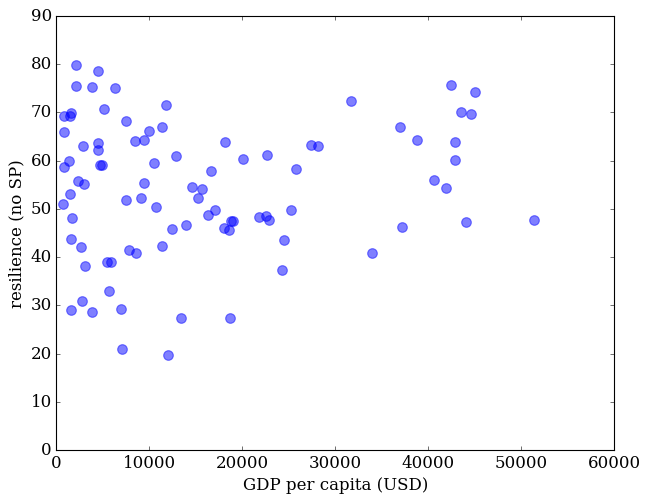

In [22]:
# resilience WITHOUT social protection

y=100*df.resilience_no_shock_no_SP

annotated_plot(df["gdp_pc_pp"],y,xlabel = "GDP per capita (USD)",ylabel = "resilience (no SP)");

logical = y >200

plt.savefig("img/resilience_no_shock_no_SP_vs_gdp_pc.png",bbox_inches="tight")

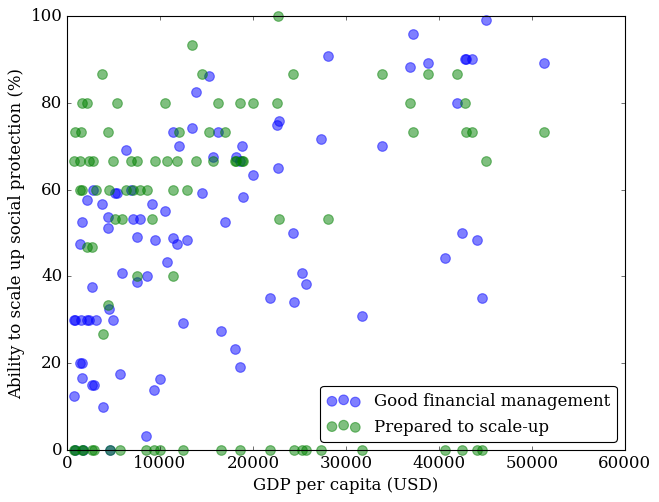

In [23]:

x=df["gdp_pc_pp"]
y=(100*df["borrow_abi"]+df["prepare_scaleup"])/2
#plt.plot(x,100*df["borrow_abi"],color='blue',marker='.',markeredgewidth=1,linestyle='None',markersize=mks,clip_on=False)

df_ = df[["gdp_pc_pp","borrow_abi","prepare_scaleup"]].dropna()

annotated_plot(df_["gdp_pc_pp"],100*df_["borrow_abi"],xlabel = "GDP per capita (USD)",ylabel = "Ability to scale up social protection (%)");

plt.legend(["Good financial management","Prepared to scale-up"],prop=font)
plt.savefig("img/ability_to_borrow")

annotated_plot(df_["gdp_pc_pp"],100*df_["prepare_scaleup"],color="green",same_fig=True);
#annotated_plot(df_["gdp_pc_pp"],50*(df_["prepare_scaleup"]+df_["borrow_abi"]),color="green",same_fig=True);
plt.ylim(ymax=100)

#plt.legend(["Ability to borrow","Prepared to scale-up","Total"],prop=font)
plt.legend(["Good financial management","Prepared to scale-up"],prop=font,loc="lower right")

plt.savefig("img/ability_to_scale_up",bbox_inches="tight")

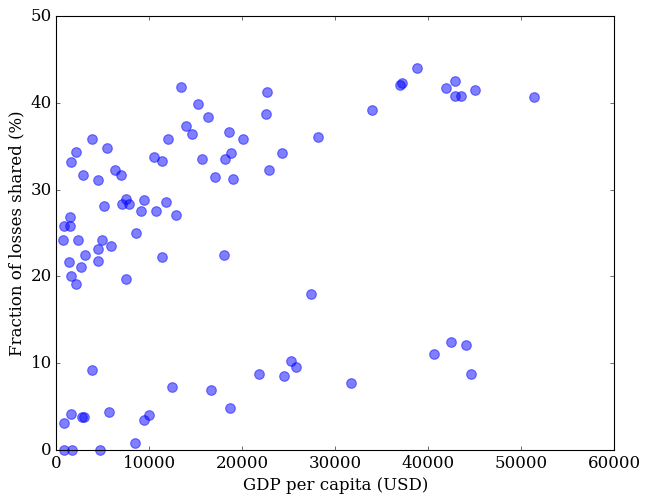

In [24]:
plt.rc('font', **font)
plt.figure(figsize=(9,7))

x=df["gdp_pc_pp"]
y=100*df["sigma_p"]
#y_r=100*df["sigma_r"]

plt.xlabel("GDP per capita (USD)")
annotated_plot(x,y,color="blue",same_fig=True);
#annotated_plot(x,y_r,color="blue",same_fig=True);
plt.xlim(xmin=0);plt.ylim(ymin=0)
#plt.legend(["Poor people","Non-poor people"],prop=font,loc="upper left")
plt.ylabel("Fraction of losses shared (%)")
logical =  False&(x>0)

for label, x_, y_ in zip(df.index[logical], x[logical],y[logical]):
    plt.annotate(
        label, 
        xy = (x_, y_), xytext = (10, 0),
        textcoords = 'offset points', ha = 'left', va = 'center',
        #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
)
plt.savefig("img/sigma_vs_gdp.png",bbox_inches="tight")  

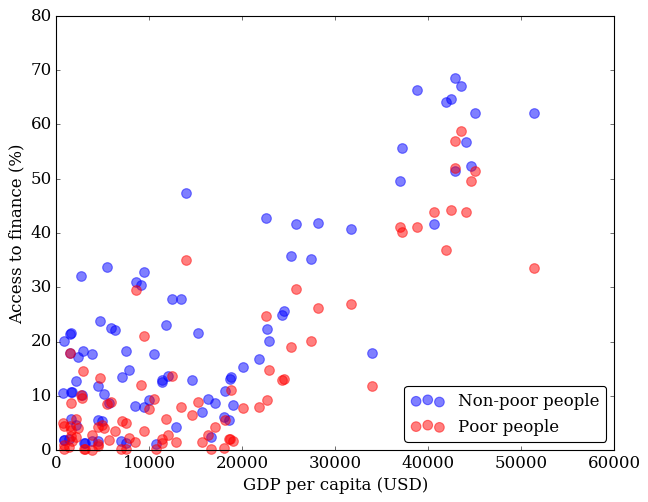

In [25]:
plt.rc('font', **font)
plt.figure(figsize=(9,7))

x=df["gdp_pc_pp"]
y=100*df["axfin_p"]
y_r=100*df["axfin_r"]

plt.xlabel("GDP per capita (USD)")
annotated_plot(x,y_r,color="blue",same_fig=True);
annotated_plot(x,y,color="red",same_fig=True);
plt.xlim(xmin=0);plt.ylim(ymin=0)

plt.legend(["Non-poor people","Poor people"],prop=font,loc="lower right")
plt.ylabel("Access to finance (%)")
logical =  False&(x>0)

for label, x_, y_ in zip(df.index[logical], x[logical],y[logical]):
    plt.annotate(
        label, 
        xy = (x_, y_), xytext = (10, 0),
        textcoords = 'offset points', ha = 'left', va = 'center',
        #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
)
plt.savefig("img/bank_accounts.png",bbox_inches="tight")  

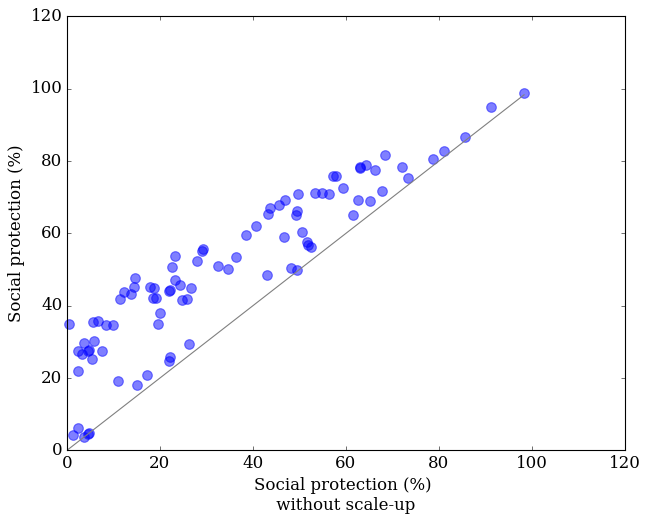

In [26]:
plt.rc('font', **font)
plt.figure(figsize=(9,7))
ax= [0,df.social_p.max()*100]

x=100*df["social_p"]
y=100*df["tot_p"]


plt.plot(ax,ax,color="gray")

annotated_plot(x,y,same_fig=True);
plt.xlim(xmin=0);plt.ylim(ymin=0)

plt.xlabel("Social protection (%) \n without scale-up ")
plt.ylabel("Social protection (%)")
logical =  False&(y>10)

for label, x, y in zip(df.ix[logical,"iso3"], x[logical],y[logical]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (10, 0),
        textcoords = 'offset points', ha = 'left', va = 'center',
        #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
)

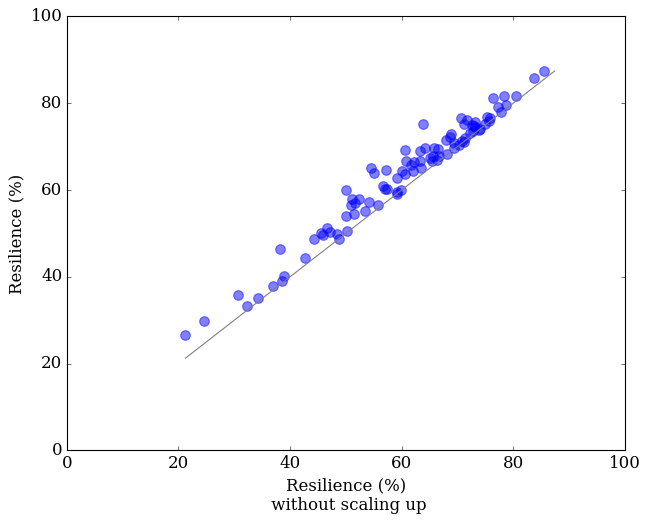

In [27]:
plt.rc('font', **font)
plt.figure(figsize=(9,7))

x=df["resilience_no_shock_no_uspcale"]*100
y=df["resilience_no_shock"]*100
ax=  [x.min(),y.max()]
plt.plot(ax,ax,color="gray")
annotated_plot(x,y,same_fig=True);
plt.xlim(xmin=0);plt.ylim(ymin=0)
ax= np.array([y.max(),x.min()])
plt.xlabel("Resilience (%)\n without scaling up")
plt.ylabel("Resilience (%)")

plt.savefig("img/effect_of_scaleup.png",bbox_inches="tight")

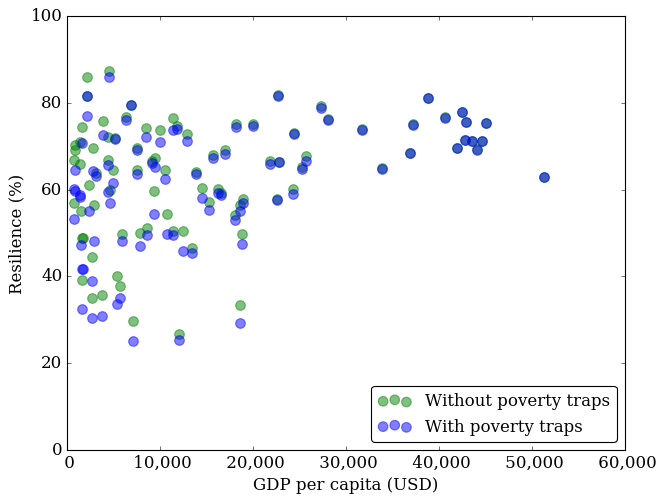

In [28]:
names = df["country"].replace({"United Kingdom":"UK",
                            "Czech Republic": "Czech R.",
                            "United States": "USA",
                            "Costa Rica": " ",
                        "Netherlands":"",
                            "France":"Fra."})
df_ = df[["gdp_pc_pp","resilience","resilience_no_shock"]].dropna()

x=df_.gdp_pc_pp
y=df_.resilience*100
y2=df_.resilience_no_shock*100

annotated_plot(x,y2,color="green");

plt.xlim(xmin=0);plt.ylim(ymin=0)
plt.legend(["With poverty traps"],prop=font,loc="lower right",fancybox=True)
plt.savefig("img/resilience_w_shocks.png",bbox_inches="tight")

annotated_plot(x,y,xlabel = "GDP per capita (USD)",ylabel = "Resilience (%)",tool_tips=tool_tips,same_fig=True,);

plt.legend(["Without poverty traps","With poverty traps"],prop=font,loc="lower right",fancybox=True)
plt.savefig("img/resilience_w_or_wo_shocks.png",bbox_inches="tight")

import matplotlib
plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ' ,')))

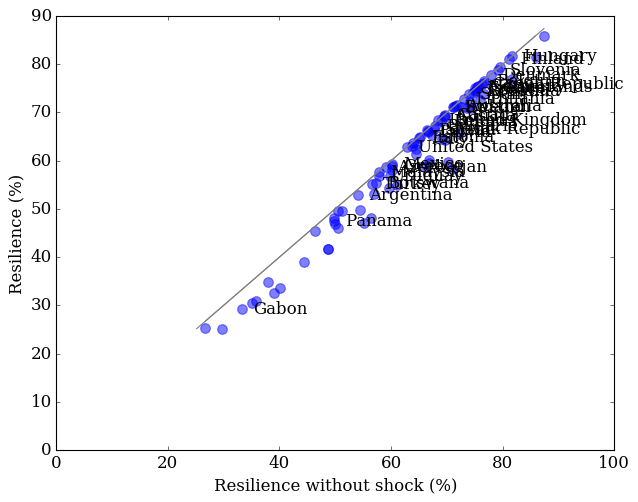

In [29]:
y=df.resilience*100
x=df.resilience_no_shock*100
aw=[100*df[["resilience","resilience_no_shock"]].min(),100*df[["resilience","resilience_no_shock"]].max()]
annotated_plot(x,y,xlabel = "Resilience without shock (%)",ylabel = "Resilience (%)");
plt.plot(aw,aw,color="gray")
plt.savefig("img/resilience_w_against_wo_shocks.png",bbox_inches="tight")

logical = df.gdp_pc_pp >15000

for label, x, y in zip(df.ix[logical,"country"], x[logical],y[logical]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (10, 0),
        textcoords = 'offset points', ha = 'left', va = 'center',
        #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
)


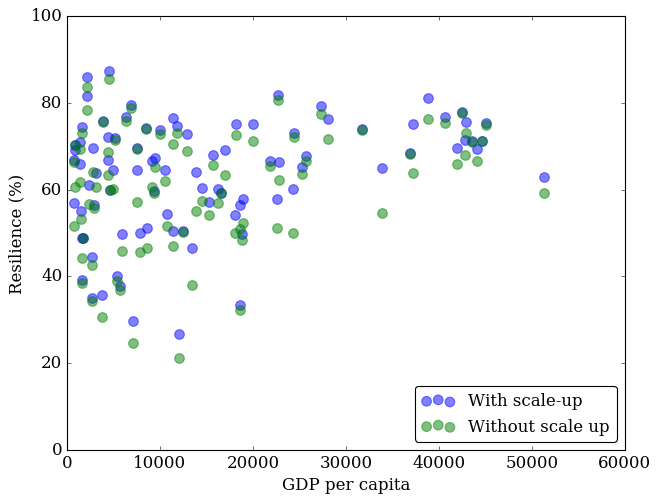

In [30]:

plt.figure(figsize=(9,7))
y=100*df["resilience_no_shock_no_uspcale"]
x=df["gdp_pc_pp"]

annotated_plot(x,100*df.resilience_no_shock,color="blue",tool_tips=tool_tips)
annotated_plot(x,y,color="green",same_fig=True)

plt.ylabel("Resilience (%)")
plt.xlabel("GDP per capita")
plt.legend(["With scale-up","Without scale up"],prop=font,loc="lower right")
logical =  False&(np.array(range(df.shape[0]))%1==0)

plt.savefig("img/resilience_with_without_scalup.png",bbox_inches="tight")

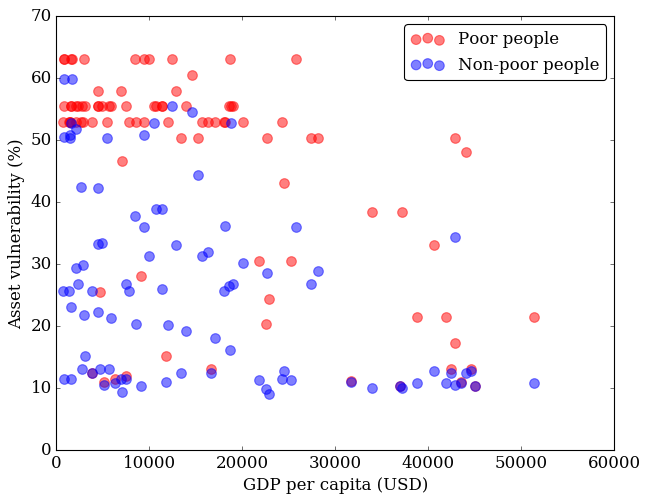

In [31]:
x=df["gdp_pc_pp"]
y=100*df["v_p"]
y_r=100*df["v_r"]

annotated_plot(x,y,color="red");
annotated_plot(x,y_r,color="blue",same_fig=True);
plt.xlim(xmin=0);plt.ylim(ymin=0)
plt.xlabel("GDP per capita (USD)")
plt.legend(["Poor people","Non-poor people"],prop=font,loc="upper right")
plt.ylabel("Asset vulnerability (%)")

plt.savefig("img/vulnerability.png",bbox_inches="tight")  

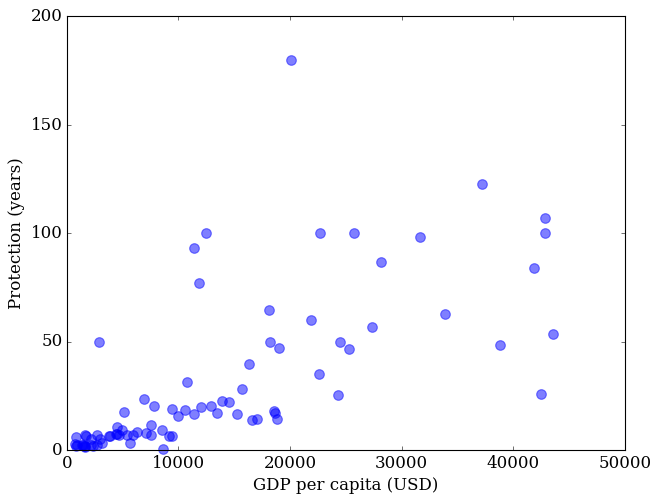

In [32]:
df_ = df.query("protection<200")

x=df_["gdp_pc_pp"]
y=df_["protection"]

annotated_plot(x,y,color="blue");
plt.xlim(xmin=0);plt.ylim(ymin=0)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Protection (years)")

plt.savefig("img/protection.png",bbox_inches="tight")  

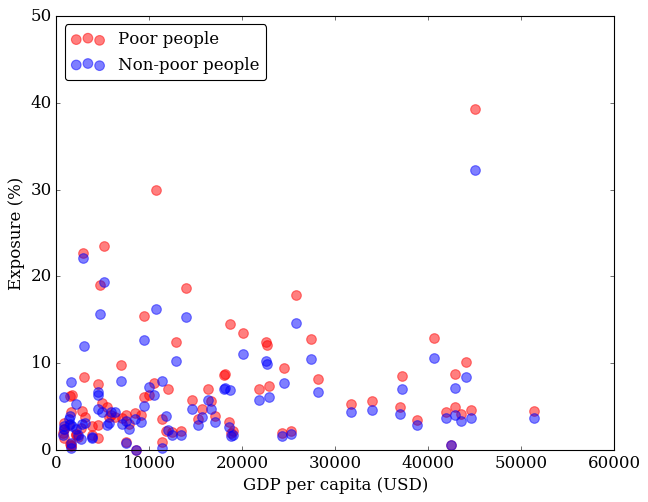

In [33]:
x=df["gdp_pc_pp"]
y=100*df["fap"]
y_r=100*df["far"]

annotated_plot(x,y,color="red");
annotated_plot(x,y_r,color="blue",same_fig=True);
plt.xlim(xmin=0);plt.ylim(ymin=0)
plt.xlabel("GDP per capita (USD)")
plt.legend(["Poor people","Non-poor people"],prop=font,loc="upper left")
plt.ylabel("Exposure (%)")

plt.savefig("img/exposure.png",bbox_inches="tight")  

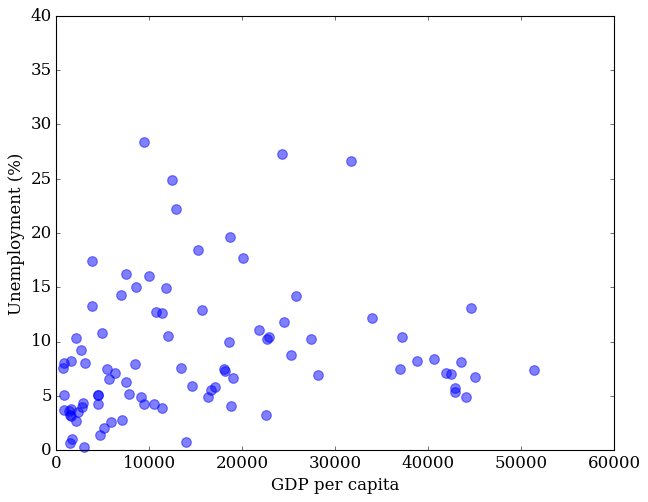

In [34]:
annotated_plot(df.gdp_pc_pp,df["unemp"]*100,color="blue")
plt.ylim(ymax=40)
#plt.xlim(xmax=65000)
                        
plt.ylabel("Unemployment (%)")
plt.xlabel("GDP per capita")
plt.savefig("img/unemployment.png",bbox_inches="tight")

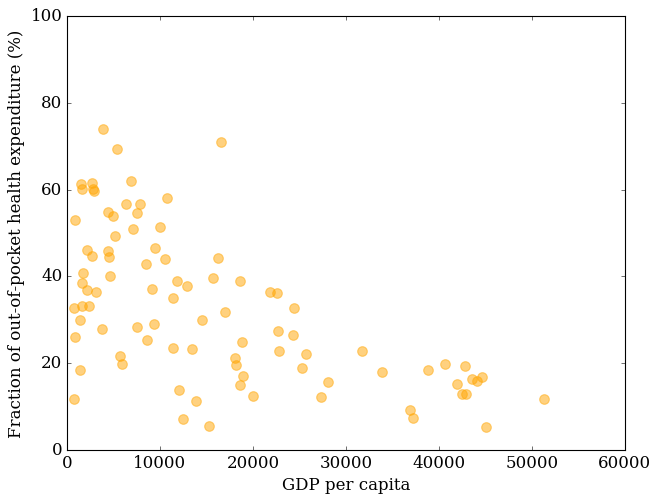

In [35]:

annotated_plot(x,df["ophe"]*100,color="orange")
plt.ylabel("Fraction of out-of-pocket health expenditure (%)")
plt.xlabel("GDP per capita")
plt.ylim(ymax=100)
#plt.xlim(xmax=65000)
plt.savefig("img/outofpocket.png",bbox_inches="tight")


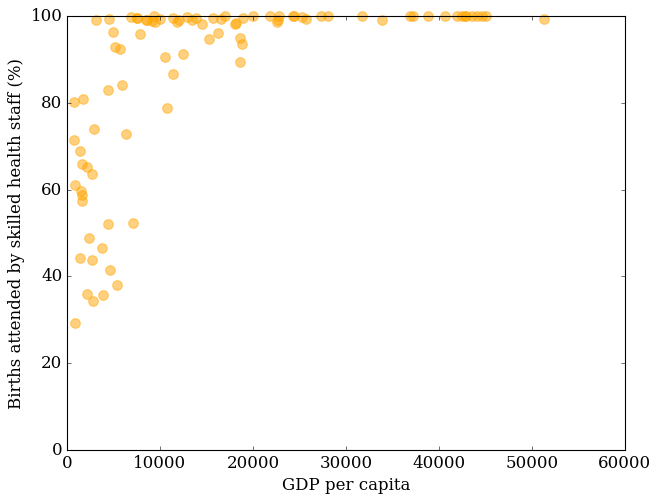

In [36]:

annotated_plot(x,df["bashs"]*100,color="orange")
plt.ylabel("Births attended by skilled health staff (%)")
plt.xlabel("GDP per capita")
plt.ylim(ymax=100)
#plt.xlim(xmax=65000)
plt.savefig("img/skilledhealth.png",bbox_inches="tight")


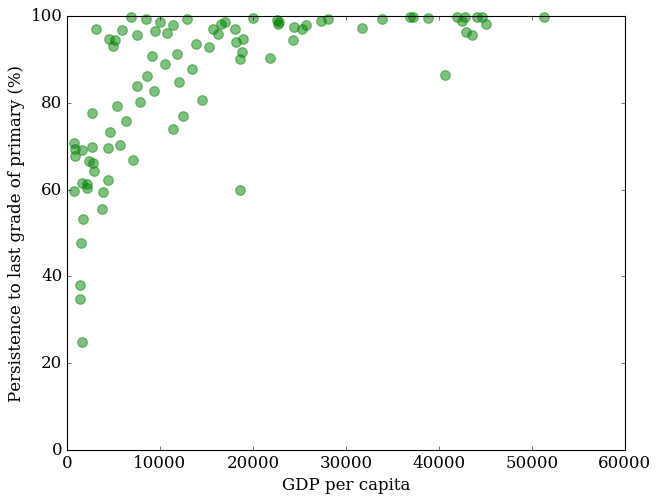

In [37]:

plt.figure(figsize=(9,7))
annotated_plot(x,df["plgp"]*100,color="green",same_fig=True)
plt.ylim(ymax=100)
plt.xlabel("GDP per capita")
#plt.xlim(xmax=65000)
plt.ylabel("Persistence to last grade of primary (%)")
plt.savefig("img/persistence_school.png",bbox_inches="tight")

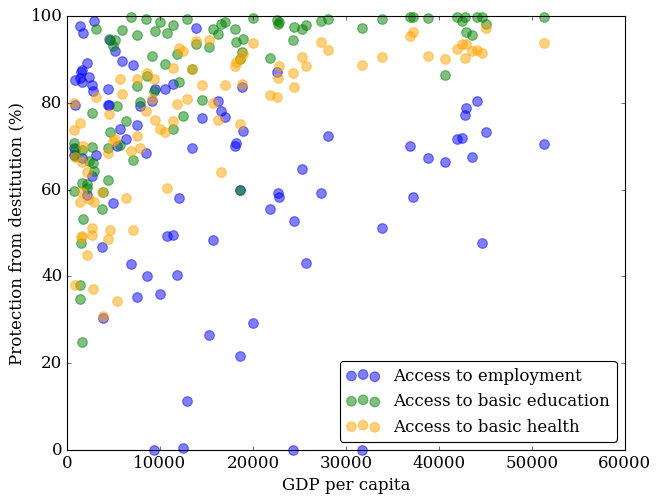

In [38]:

plt.figure(figsize=(9,7))

x=df["gdp_pc_pp"]
health = (df["axhealth"])*100
educ = (df["plgp"])*100
job = (1-df["unemp"].apply(lambda x: min(4*x,1)))*100
institutional_exposure = (health+educ+job)

def the_legend():
    plt.legend(["Access to employment","Access to basic education","Access to basic health"],prop=font,loc="lower right")

                          
plt.ylabel("Protection from destitution (%)")
plt.xlabel("GDP per capita")


annotated_plot(x,job,color="blue",same_fig=True)
the_legend()
plt.ylim(ymax=100)
plt.savefig("img/destitution_factors_job",bbox_inches="tight")


annotated_plot(x,educ,color="green",same_fig=True)
the_legend()
plt.ylim(ymax=100)
plt.savefig("img/destitution_factors_job_n_educ",bbox_inches="tight")

annotated_plot(x,health,color="orange",same_fig=True)
plt.ylim(ymax=100)
the_legend()
plt.savefig("img/destitution_factors.png",bbox_inches="tight")

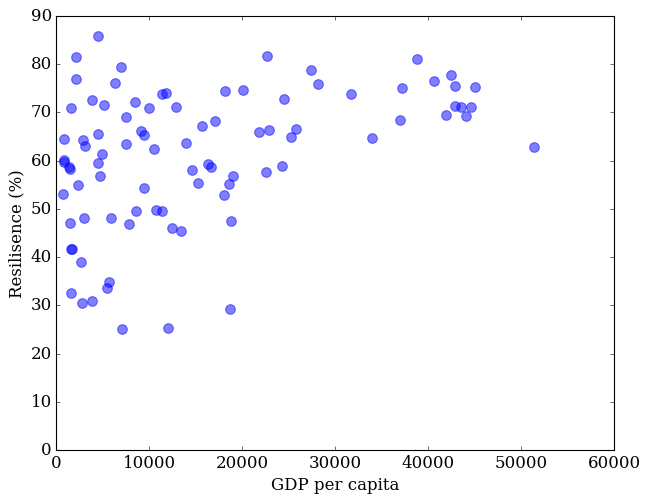

In [39]:
# Economic resilience
x=df["gdp_pc_pp"]
y=df["resilience"]*100

annotated_plot(x,y,names=names,xlabel = "GDP per capita",ylabel = "Resilisence (%)",logical =y>1000,saveto="resilience.png");


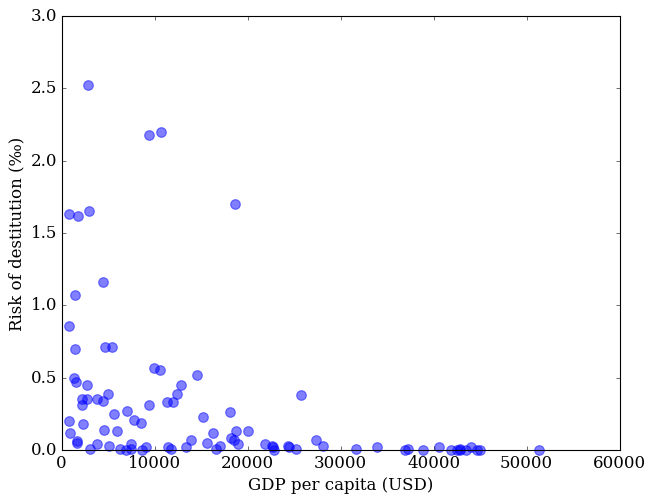

In [40]:
# risk of destitution
plt.figure(figsize=(9,7))

x=df["gdp_pc_pp"]
y=1000*df["destitution_exposure"]
#plt.plot(x,x,color="green",marker='None',markeredgewidth=1,linestyle='-',markersize=12,clip_on=False)
annotated_plot(x,y,same_fig=True)
plt.ylabel("Risk of destitution (‰)")
plt.xlabel("GDP per capita (USD)")
logical = y>200#y>0.95*(1-x/50000)

for label, x, y in zip(df.ix[logical,"country"], x[logical],y[logical]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (10, 0),
        textcoords = 'offset points', ha = 'left', va = 'center',
        #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
)
plt.savefig("img/destitution_exposure.png",bbox_inches="tight")

In [41]:
H_mumbai=0.68
H_avg=0.53

In [53]:
result = sm.ols(formula="resilience ~ gdp_pc_pp", data=df).fit()
df["expected_resilience"]=result.params.Intercept+result.params.gdp_pc_pp*df["gdp_pc_pp"]
df["resilience_anomaly"]=df["resilience"]-df["expected_resilience"]
a=result.summary()
f = open('results/regression.csv', 'w')
f.write(a.as_csv())
f.close()
a

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             resilience   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     17.65
Date:                Mon, 09 May 2016   Prob (F-statistic):           6.34e-05
Time:                        19:02:37   Log-Likelihood:                 56.719
No. Observations:                  90   AIC:                            -109.4
Df Residuals:                      88   BIC:                            -104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5453      0.021     26.222      0.000         0.504     0.587
gdp_pc_pp   4.227e-06   1.01e-06      4.202      0.000      2.23e-06  6.23e-06
==============================================================================
Omnibus:                        4.260   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.655
Skew:                          -0.479   Prob(JB):                        0.161
Kurtosis:                       3.238   Cond. No.                     3.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

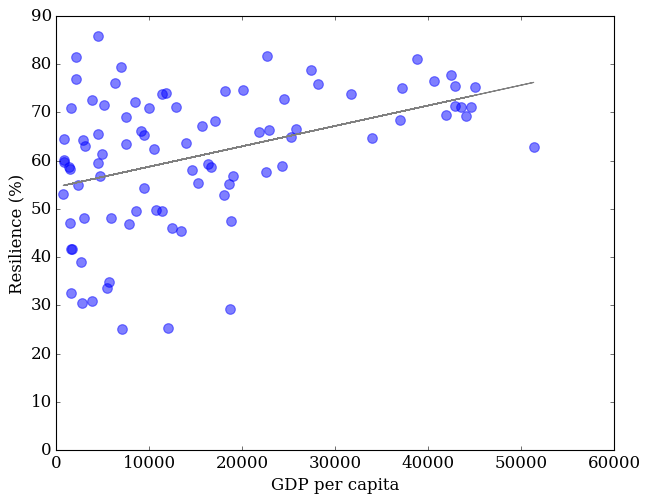

In [43]:
plt.rc('font', **font)
plt.figure(figsize=(9,7))
x=df["gdp_pc_pp"]
y=df["resilience"]*100
yp= df["expected_resilience"]*100
yp.ix[df["resilience"].isnull()]=np.nan
plt.plot(x,yp,color="gray",markeredgewidth=1,markersize=mks,clip_on=False)
annotated_plot(x,y,color="blue",same_fig=True)

plt.ylabel("Resilience (%)")
plt.xlabel("GDP per capita")

logical = (True | (x>0)) & debug

for label, x, y in zip((df.ix[logical,"country"]), x[logical], y[logical]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (10, 0),
        textcoords = 'offset points', ha = 'left', va = 'center',
        #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
)
plt.savefig("img/resilience_regression.png",bbox_inches="tight")

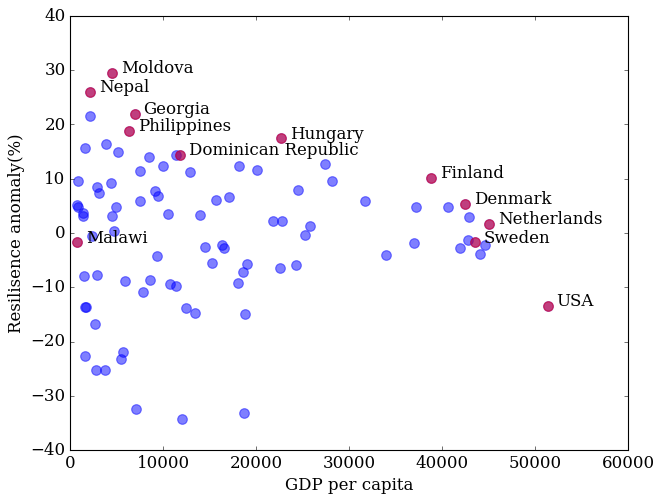

In [44]:
x=df["gdp_pc_pp"]
y=df["resilience_anomaly"]*100
names=df.country;

debug=False
annotated_plot(x,y,xlabel = "GDP per capita",ylabel = "Resilisence anomaly(%)",enforce_zerobound=False);
plt.xlim(0)

plt.savefig("img/resilience_anomaly.png",bbox_inches="tight");

countries_to_show =df.country.tolist()#
countries_to_show =["Georgia", "Hungary", 
                    "Sweden", "Netherlands", "Dominican Republic","Finland","Denmark",
                    "United States",  "Moldova","Nepal","Hungary"
                    "Bulgaria", "Malawi", "Philippines"]
indexes = [c in countries_to_show for c in df.country]
logical = indexes

annotated_plot(x[logical],y[logical],color="red",enforce_zerobound=False,same_fig=True);

for label, x, y in zip((names[logical]).replace({"United States":"USA", "Yemen, Rep.":"Yemen"}), x[logical], y[logical]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (8, 4),
        textcoords = 'offset points', ha = 'left', va = 'center',
        
)

plt.savefig("img/resilience_anomaly_anotated.png",bbox_inches="tight");

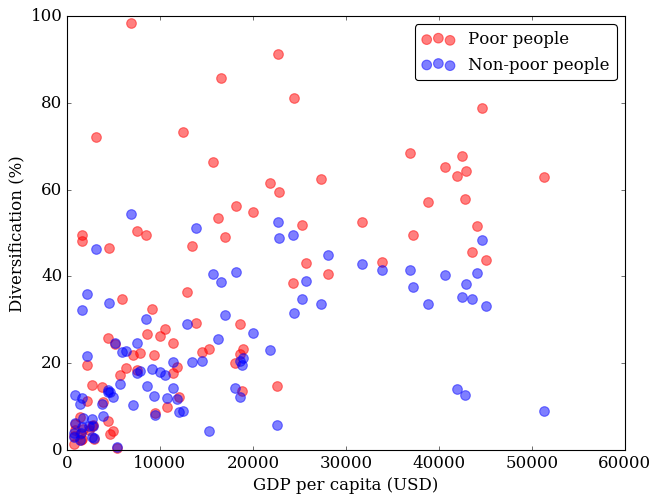

In [45]:
# Diversification parameters in the economies

x = df.gdp_pc_pp
y=100*df.social_p
z=100*df.social_r

annotated_plot(x,y,color="red",ylabel="Diversification (%)")
annotated_plot(x,z,color="blue",same_fig=True,xlabel="GDP per capita (USD)")

plt.ylim(ymax=100)
plt.legend(["Poor people","Non-poor people"],prop=font)

plt.savefig("img/lambda_vs_gdp_pc.png",bbox_inches="tight")

In [46]:
# Correlation of various resilience with GDP per capita and poverty
a=df[["resilience","fa","risk"]].dropna().corr()
a.to_excel("results/corr_resilience_expo.xlsx")
a

,resilience,fa,risk
resilience,1.000000,0.233113,-0.175610
fa,0.233113,1.000000,0.008634
risk,-0.175610,0.008634,1.000000


In [47]:
# Correlation of various resilience with GDP per capita and poverty
a=df[["gdp_pc_pp","share1","resilience_no_shock","resilience"]].dropna().corr()
a.to_excel("results/corr_resilience_pib.xlsx")
a

,gdp_pc_pp,share1,resilience_no_shock,resilience
gdp_pc_pp,1.000000,0.204377,0.305345,0.408766
share1,0.204377,1.000000,0.505847,0.493244
resilience_no_shock,0.305345,0.505847,1.000000,0.982918
resilience,0.408766,0.493244,0.982918,1.000000


In [48]:
# Cross-parameter resilience
# CAUTION: in the subset of countries with all data only!!!
a=df[["social_p","social_r","gdp_pc_pp","resilience","shew"]].dropna().corr()
a.to_excel("results/corr_resilience_social_shew.xlsx")
a

,social_p,social_r,gdp_pc_pp,resilience,shew
social_p,1.000000,0.751896,0.620814,0.484775,-0.045662
social_r,0.751896,1.000000,0.513901,0.596702,0.036808
gdp_pc_pp,0.620814,0.513901,1.000000,0.408766,0.119196
resilience,0.484775,0.596702,0.408766,1.000000,0.105820
shew,-0.045662,0.036808,0.119196,0.105820,1.000000


In [49]:
#Lognorm from mean and H
def lognorm_pdf(x,m=1,H=1):
    #i douled checked this functions. does what it says it does.
    
    #paramters of the underlying normal
    sigma = np.sqrt(-2*np.log(H))  #h=med/m = exp(-s**2/2)   log(h) = -s**2/2
    mu = np.log(m*H)   #h=med/m   med = m*h = exp(mu)
    
    y=(1/(x*sigma*np.sqrt(2*np.pi)))* np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    
    return y

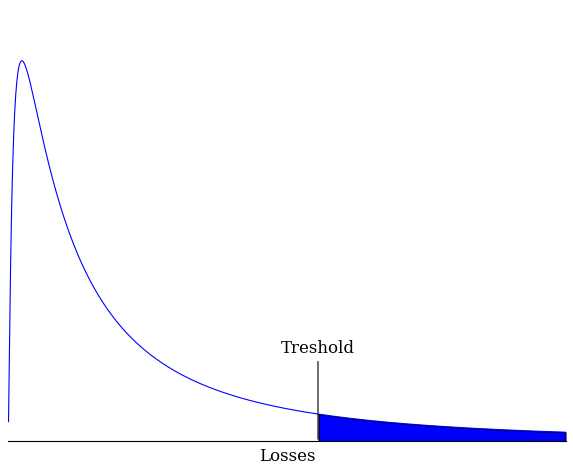

In [50]:
#illustrates risk of desitution as a function of H
x=np.arange(0,180,1/6)
m=70
h1=0.4
h2=0.7
cur_income=100

y1=lognorm_pdf(x,m,h1)
y2=lognorm_pdf(x,m,h2)


where = x>cur_income

x_anot= cur_income+150/6
x_anot2 = x_anot +10

def first_part_figure():
    

    plt.plot(x,y1)
    plt.fill_between(x[where],0*x[where],y1[where], alpha = 1)

    
    
    plt.annotate("Treshold",  xy=(cur_income,0),xycoords='data',ha="center",color='black',
              xytext=(0, 80), textcoords='offset points',arrowprops=dict(arrowstyle="-",
                                color="black" )
                                #connectionstyle="arc3,rad=0.1",
                )

    # plt.annotate("Destitutes",  xy=(x_anot,y1[x==x_anot]/2),xycoords='data',ha="center",color='blue',
    #           xytext=(20, 140), textcoords='offset points',arrowprops=dict(arrowstyle="-",
    #                             color="blue",
    #                             connectionstyle="arc3,rad=0.2",)
    #             )


def write_labels():
    plt.xlabel("Losses")

    plt.yticks([])
    ax=plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['top'].set_visible(False)
    return ax


plt.figure(figsize=(9,7))    
first_part_figure()    
write_labels()
plt.savefig("img/theta1",bbox_inches="tight")


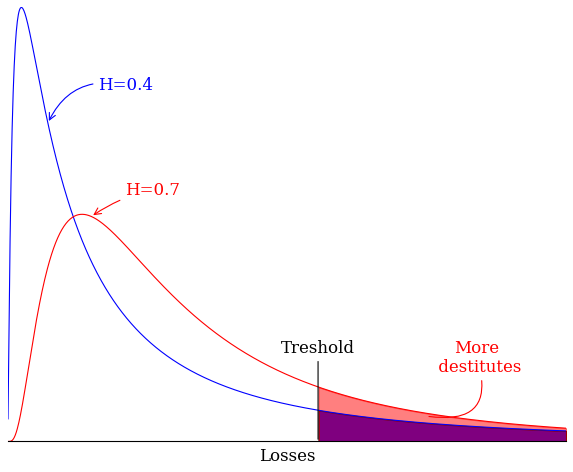

In [51]:
plt.figure(figsize=(9,7))
first_part_figure();

ax=write_labels()


ax.annotate("H="+str(h1),  xy=(13,y1[x==13]),xycoords='data',ha="left",color="blue",
          xytext=(45, 30), textcoords='offset points', arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                            color="blue", 
                            connectionstyle="arc3,rad=0.4",
                            )
            )

plt.plot(x,y2,color="red");
plt.fill_between(x[where],0*x[where],y2[where], alpha = 0.5, color="red")

plt.annotate("H="+str(h2),  xy=(27,y2[x==27]),xycoords='data',ha="left",color='red',
          xytext=(30, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                            color="red", 
                            connectionstyle="arc3,rad=0.1",
                            )
            )
x_anot =x_anot+.5
plt.annotate("More\n destitutes",  xy=(x_anot2,y2[x==x_anot2]*.9),xycoords='data',ha="center",color='red',
          xytext=(45, 40), textcoords='offset points',arrowprops=dict(arrowstyle="-",
                            color="red",
                            connectionstyle="arc3,rad=-0.8",)
            )

plt.savefig("img/theta2.png",bbox_inches="tight")



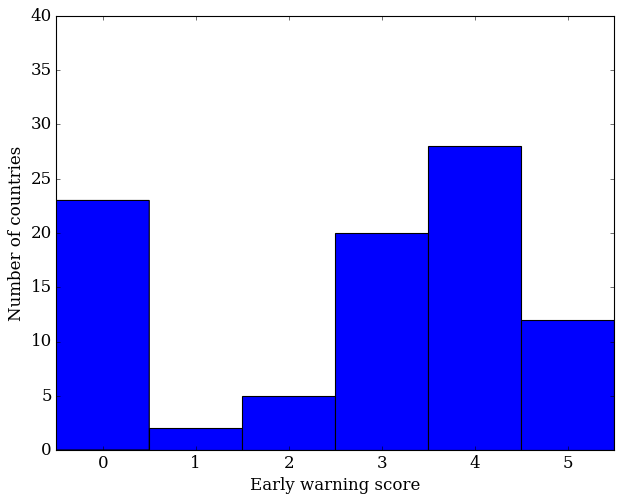

In [52]:
# Distribution of scores regarding early warning

plt.rc('font', **font)
plt.figure(figsize=(9,7))
logique =  (df["resilience"]>0) 
df['drwsh']=df["shew"]*5-0.5
plt.hist(df["drwsh"].dropna().values, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5])
plt.ylabel("Number of countries")
plt.xlabel("Early warning score")
plt.axis([-0.5,5.5,0,40])
#plt.ticklabel_format(axis='x',useOffset=0)

plt.savefig("img/EarlyWarning.png",bbox_inches="tight")